In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math as m
import csv
import numpy as np
from typing import List, Dict, Tuple

{(-10, -2): [2, ((-7.955195589800453, -1.707530584478917), (-12.044804410199546, -2.2924694155210936), (-8, 16), (-5, -14), 83.6598082540901, 292.6198649480404), 'R'], (5, 10): [2, ((7.711669048173352, 10.951202141347125), (2.2883309518266484, 9.048797858652875), (-8, 16), (0, 0), 155.22485943116808, 243.43494882292202), 'L'], (-8, 16): [2, ((-9.681336353374148, 18.978743095907507), (-6.318663646625852, 13.021256904092493), (-10, -2), (5, 10), 263.6598082540901, 335.22485943116806)], (-5, -14): [2, ((-2.8658230888265264, -13.922024586816336), (-7.134176911173473, -14.077975413183664), (-10, -2), (-6, -17), 112.61986494804042, 251.56505117707798), 'L'], (0, 0): [2, ((-0.817986153169427, -6.108108261338434), (0.817986153169427, 6.108108261338434), (5, 10), (-1, 5), 63.43494882292201, 101.30993247402021), 'L'], (-6, -17): [2, ((-3.7933096453776116, -16.70448425646959), (-8.206690354622388, -17.2955157435304), (-5, -14), (-4, -20), 71.56505117707799, 303.69006752597977), 'R'], (-4, -20): [

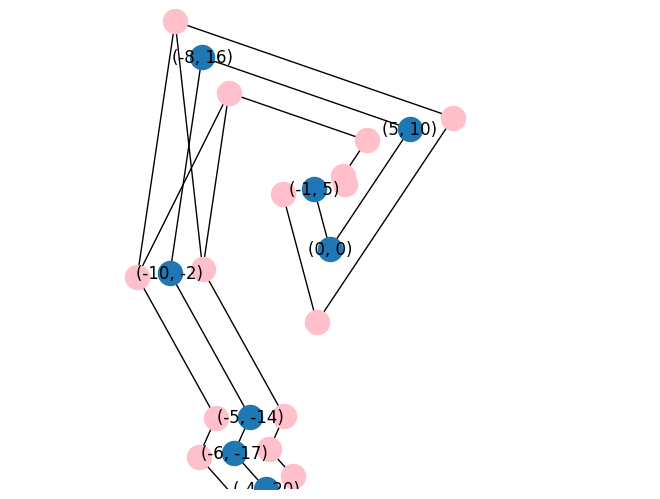

In [6]:
G = nx.Graph()
NR = []
NL = []
ER = []
EL = []
# def graphGenerator():
#     ptX = 0
#     ptY = 0
#     G.add_node((ptX,ptY))
#     init = True
#     while init == True:
#         # print(addN(ptX,ptY))
#         More = input("more street ? (y/n)\n")
#         if (More == 'y'):
#             originP = input("from which point ? \n")
#             user = originP.split(",")
#             ptX, ptY =float(user[0]), float(user[1])
#         else:
#             init = False
    
# #add parameter meaning the width of the street and parameter for notifies street crossing, edge parameter sensitive
# def addN(ptX, ptY):
#     lenght = float(input("lenght street : "))
#     radius = float(input("radius street : "))
#     width = float(input("width street : "))
#     nPtX = ptX+ lenght * np.cos(m.radians(radius)) #
#     nPtY = ptY+lenght * np.sin(m.radians(radius)) #
#     G.add_node((nPtX, nPtY), label="milieu")
#     G.add_edge((ptX, ptY),(nPtX, nPtY), label="milieu")
#     return(nPtX, nPtY)

G.add_edges_from([
    # ((-15,9),(-10,-2), {'index': 4, 'width':2}),
    # ((-8,16),(-10,-2), {'index': 4, 'width':2}),
    # ((10,10), (-8,16), {'index': 1, 'width': 2}), 
    # ((10,10), (15,-6), {'index': 1, 'width': 2}), 
    # ((10,10), (0,0), {'index': 2, 'width': 2}),
    # ((0,0), (15,-6), {'index': 2, 'width': 2}),
    # ((0,0), (-5,-3), {'index': 2, 'width': 2})


    ((-8,16),(-10,-2), {'width':2}),
    ((5,10), (-8,16), {'width': 2}), 
    ((-10,-2),(-5,-14), {'width':2}),
    ((-6,-17),(-5,-14), {'width':2}),
    ((-6,-17),(-4,-20), {'width':2}),
    #((-6,-20),(-18,-2), {'index': 4, 'width':2}),
    #((-18,-2),(-20,+15), {'index': 4, 'width':2}),
    #((-8,16),(-10,-2), {'width':2}),
    #((5,10), (-8,16), {'width': 2}), 
    ((5,10), (0,0), {'width': 2}),
    #((0,0), (15,-6), {'width': 2}),
    ((0,0), (-1,5), {'width': 2}),
    ])


# pos = {node: node for node in G.nodes}
# nx.draw(G, pos, with_labels=False)
def neighborGenerator(G):
    neighborEdge = []
    listInter = []
    for node in G.nodes:
            if len(G.edges(node)) > 1 and len(G.edges(node)) < 3:
                blacklist = []
                l = []
                for E1 in G.edges(node):
                    blacklist.append(E1)
                    # print("E1 blacklisté : ", E1)
                    for E2 in G.edges(node):
                        if E2 not in blacklist:
                            for i in E2:
                                second_node1 = set(E1).difference([node]).pop()
                                second_node2 = set(E2).difference([node]).pop()
                                radiusE1 = m.degrees(m.atan(abs(node[1] - second_node1[1])/abs(node[0] - second_node1[0])))
                                radiusE2 = m.degrees(m.atan(abs(node[1] - second_node2[1])/abs(node[0] - second_node2[0])))
                                # print("node : ",node)
                                # print("E1 : ", E1)
                                # print("E2 : ", E2)
                                if (node[0] > second_node1[0] and node[1] <= second_node1[1]):
                                    radiusE1 = 180 - radiusE1
                                elif (node[0] <= second_node1[0] and node[1] > second_node1[1]):
                                    radiusE1 = 360 - radiusE1
                                elif (node[0] > second_node1[0] and node[1] > second_node1[1]):
                                    radiusE1 = 180 + radiusE1
                                if (node[0] > second_node2[0] and node[1] <= second_node2[1]):
                                    radiusE2 = 180 - radiusE2
                                elif (node[0] <= second_node2[0] and node[1] > second_node2[1]):
                                    radiusE2 = 360 - radiusE2
                                elif (node[0] > second_node2[0] and node[1] > second_node2[1]):
                                    radiusE2 = 180 + radiusE2
                                radiusE1E2 = abs(radiusE1 - radiusE2)
                                l.append((E1,E2,radiusE1E2, radiusE1, radiusE2))
                            #print("E2 : ", i)
                            #print("list of radius : ", l)
                            neighbor = min(l, key=lambda x: x[2], default=None)
                            #print("E1 de liste min : ", neighbor)
                            neighborEdge.append(neighbor)
                            #print("neightborEdge : ", neighborEdge)
                        l = []
            # if len(G.edges(node)) > 1:
            #     l, UR, UL, BL, BR, bigList = [],[],[],[],[],[] 
            #     for E1 in G.edges(node):
            #         second_node1 = set(E1).difference([node]).pop()
            #         radiusE1 = m.degrees(m.atan(abs(node[1] - second_node1[1])/abs(node[0] - second_node1[0])))
            #         if (node[0] > second_node1[0] and node[1] <= second_node1[1]):
            #             radiusE1 = 180 - radiusE1
            #             UL.append((E1, radiusE1))
            #         elif (node[0] <= second_node1[0] and node[1] > second_node1[1]):
            #             radiusE1 = 360 - radiusE1
            #             BR.append((E1, radiusE1))
            #         elif (node[0] > second_node1[0] and node[1] > second_node1[1]):
            #             radiusE1 = 180 + radiusE1
            #             BL.append((E1, radiusE1))
            #         else:
            #             UR.append((E1, radiusE1))
            #     for i in [UR, UL, BL, BR]:
            #         l = sorted(i, key=lambda x: x[1])
            #         bigList.extend(l)
            #         l = []
            #     listInter.append(len(bigList))
            #     if len(bigList) > 2:
            #         for k in range(len(bigList)-1):
            #             radiusE1E2 = abs(bigList[k][1] - bigList[k+1][1])
            #             l.append((bigList[k][0],bigList[k+1][0],radiusE1E2, bigList[k][1], bigList[k+1][1]))
            #         radiusE1E2 = abs(bigList[0][1] + (360-bigList[-1][1]))
            #         l.append((bigList[0][0],bigList[-1][0],radiusE1E2, bigList[0][1], bigList[-1][1]))
            #     else:
            #         if (bigList[0] in UR or bigList[0] in BR) and (bigList[-1] in UR or bigList[-1] in BR) and not ((bigList[0] in UR and bigList[-1] in UR) or (bigList[0] in BR and bigList[-1] in BR)):
            #             radiusE1E2 = abs(bigList[0][1] + (360-bigList[-1][1]))
            #         else:
            #             radiusE1E2 = abs(bigList[0][1] - bigList[-1][1])
            #         l.append((bigList[0][0],bigList[-1][0],radiusE1E2, bigList[0][1], bigList[-1][1]))
            #     neighborEdge.extend(l)
            #     l = []
    #print("neighborEdge = ", neighborEdge)
    #print(listInter)
    return(neighborEdge)

exemple = []
# def sort(l):
#     if len(l) <= 1:
#         return l
    
#     pivot = l[len(l) // 2]   # Choix du pivot (ici on prend le milieu du tableau)
#     left = [x for x in l if x < pivot]        # Tous les éléments plus petits que le pivot
#     middle = [x for x in l if x == pivot]     # Tous les éléments égaux au pivot
#     right = [x for x in l if x > pivot]       # Tous les éléments plus grands que le pivot
    
#     return sort(left) + middle + sort(right)
 
def intersectionGenerator(_list:List):
    _dict = {}
    # i = 0
    # #intersection = []
    # for index0 in list2:
    #     if index0 < 3:
    #         i += 1
    #     else:
    #         for index1 in range (i, i+index0):
    #             print("listindex : ", _list[index1])
    #         i += index0
    for index in _list:
        #print("_list = ", _list)
        set1 = set(index[0]) #to recover the node
        set2 = set(index[1]) #to recover the node
        commonNode = next(iter(set1.intersection(set2)))
        #print("commonNode = ", commonNode)
        node1E1, node2E1 = index[0][0],index[0][1]
        node1E2, node2E2 = index[1][0],index[1][1]
        widthE1 = G[node1E1][node2E1]["width"]
        widthE2 = G[node1E2][node2E2]["width"]

        #+90 == node of left side

        ptE1LX1 = node1E1[0] + widthE1*np.cos(m.radians(index[3]+90)) 
        ptE1LY1 = node1E1[1] + widthE1*np.sin(m.radians(index[3]+90)) 
        ptE1LX2 = node2E1[0] + widthE1*np.cos(m.radians(index[3]+90)) 
        ptE1LY2 = node2E1[1] + widthE1*np.sin(m.radians(index[3]+90)) 
        
        ptE2LX1 = node1E2[0] + widthE2*np.cos(m.radians(index[4]+90)) 
        ptE2LY1 = node1E2[1] + widthE2*np.sin(m.radians(index[4]+90)) 
        ptE2LX2 = node2E2[0] + widthE2*np.cos(m.radians(index[4]+90)) 
        ptE2LY2 = node2E2[1] + widthE2*np.sin(m.radians(index[4]+90)) 
        
        m1L = (ptE1LY2-ptE1LY1)/(ptE1LX2-ptE1LX1)
        p1L = ptE1LY1 - m1L * ptE1LX1
        m2L = (ptE2LY2-ptE2LY1)/(ptE2LX2-ptE2LX1)
        p2L = ptE2LY1 - m2L * ptE2LX1
        
        ptE1RX1 = node1E1[0] + widthE1*np.cos(m.radians(index[3]-90)) 
        ptE1RY1 = node1E1[1] + widthE1*np.sin(m.radians(index[3]-90))
        ptE1RX2 = node2E1[0] + widthE1*np.cos(m.radians(index[3]-90))
        ptE1RY2 = node2E1[1] + widthE1*np.sin(m.radians(index[3]-90))
        
        ptE2RX1 = node1E2[0] + widthE2*np.cos(m.radians(index[4]-90))
        ptE2RY1 = node1E2[1] + widthE2*np.sin(m.radians(index[4]-90))
        ptE2RX2 = node2E2[0] + widthE2*np.cos(m.radians(index[4]-90))
        ptE2RY2 = node2E2[1] + widthE2*np.sin(m.radians(index[4]-90))
        
        m1R = (ptE1RY2-ptE1RY1)/(ptE1RX2-ptE1RX1)
        p1R = ptE1RY1-m1R*ptE1RX1
        m2R = (ptE2RY2-ptE2RY1)/(ptE2RX2-ptE2RX1)
        p2R = ptE2RY1-m2R*ptE2RX1

        xR = (p1R-p2L)/(m2L-m1R)
        yR = m2L*(p1R-p2L)/(m2L-m1R)+p2L
        xL = (p1L-p2R)/(m2R-m1L)
        yL = m2R*(p1L-p2R)/(m2R-m1L)+p2R
        
        nE1 = None
        if commonNode == node1E1:
            nE1 =  node2E1
        else:
            nE1 = node1E1
        nE2 = None
        if commonNode == node1E2:
            nE2 = node2E2
        else:
            nE2 = node1E2
        position = None
        if (commonNode[0] < nE1[0] and commonNode[0] < nE2[0]):
            position = 'R'
        else :
            position = 'L'
        if not nE1 in _dict:
            _dict[nE1] = [-1, ((ptE1RX2, ptE1RY2),(ptE1LX2, ptE1LY2), commonNode)]
        # else:
        #     if _dict[nE1][0] == -1:
        #         _dict[nE1] = [1]
        if not nE2 in _dict:
            _dict[nE2] = [-1, ((ptE2LX2, ptE2LY2),(ptE2RX2, ptE2RY2), commonNode)]
        # else:
        #     if _dict[nE2][0] == -1:
        #         _dict[nE2] = [1]
        if not commonNode in _dict:
            #print("commonNode that was not in dict = ",commonNode)
            _dict[commonNode] = [2, ((xR, yR),(xL,yL),nE1, nE2, index[3], index[4])]
        else:
            if _dict[commonNode][0] == -1:
                _dict[commonNode] = [2, ((xR, yR),(xL,yL),nE1, nE2, index[3], index[4]), position]
            else:
                _dict[commonNode].append(((xR, yR),(xL,yL),nE1, nE2, index[3], index[4]))
                _dict[commonNode].extend(position)
                _dict[commonNode][0] += 1
        
        
        # print("node1E1 =", node1E1, "node2E1 = ", node2E1)
        # print("node1E1[0] =", node1E1[0], "node2E1[0] = ", node2E1[0])
        # print("ptE1RX2 = ", ptE1RX2, "ptE1RX1 = ", ptE1RX1)
        # print("ptE1RX2-ptE1RX1 = ", ptE1RX2-ptE1RX1)
        # print("p1R = ",p1R,"p2R = ", p2R,"m2R = ", m2R,"m1R = ", m1R)
        # print("xR = ",xR)
        # print("yR = ",yR)
        #print("(xL,yL) = ", (xL,yL))
        # G.add_node((xR,yR))
        # G.add_node((xL,yL))
        # G.add_node((ptE2RX2, ptE2RY2))
        # G.add_node((ptE2LX2, ptE2LY2))
        # NR.append((xR,yR))
        # NL.append((xL,yL))
        # NR.append((ptE2RX2, ptE2RY2))
        # NL.append((ptE2LX2, ptE2LY2))

        
        # for element in intersection:
        #     if element[0] == commonNode:
        #         intersection.remove(element)
        #trace the edges
        # if node1E1 is not commonNode:
        #     intersection.append((node2E1, (xR, yR),(xL,yL)))
        #     intersection.append((node1E1, (ptE1RX2, ptE1RY2),(ptE1LX2, ptE1LY2)))
            #G.add_edge((xR, yR), (ptE1RX2, ptE1RY2))
            #ER.append(((xR, yR), (ptE1RX2, ptE1RY2)))
            #G.add_edge((xL,yL), (ptE1LX2, ptE1LY2))
            #EL.append(((xL,yL), (ptE1LX2, ptE1LY2)))
        # else:
        #     G.add_edge((ptE1RX1, ptE1RY1), (ptE1RX2, ptE1RY2))
        #     ER.append(((ptE1RX1, ptE1RY1), (ptE1RX2, ptE1RY2)))
        #     G.add_edge((ptE1LX1, ptE1LY1), (ptE1LX2, ptE1LY2))
        #     EL.append(((ptE1LX1, ptE1LY1), (ptE1LX2, ptE1LY2)))
        # if node1E2 is not commonNode:
        #     intersection.append((node2E2, (xR, yR),(xL,yL)))
        #     intersection.append((node1E2, (ptE2LX2, ptE2LY2),(ptE2RX2, ptE2RY2)))
            # G.add_edge((xL,yL), (ptE2RX2, ptE2RY2))
            # ER.append(((xL,yL), (ptE2RX2, ptE2RY2)))
            # G.add_edge((xR, yR), (ptE2LX2, ptE2LY2))
            # EL.append(((xR, yR), (ptE2LX2, ptE2LY2)))
        # else:
            # G.add_edge((ptE2RX2, ptE2RY2), (ptE2RX1, ptE2RY1))
            # ER.append(((ptE2RX2, ptE2RY2), (ptE2RX1, ptE2RY1)))
            # G.add_edge((ptE2LX2, ptE2LY2), (ptE2LX1, ptE2LY1))
            # EL.append(((ptE2LX2, ptE2LY2), (ptE2LX1, ptE2LY1)))
    for i in _dict.keys():
        if _dict[i][0] > 2:
            _dict[i][0] -= 1

    print(_dict)
    return _dict
            # print(ER, EL)
def dist(A: Tuple[float,float], B: Tuple[float,float]):
    #print(A[0])
    return m.sqrt((A[0]-B[0])**2+(A[1]-B[1])**2)
#graphGenerator()
G1 = nx.Graph()
def graphEntire(_dict: Dict):
    blacklist = []
    for n1 in G.nodes:
        print("n1 = ",n1)
        for n2 in G.neighbors(n1):
            if (n2 not in blacklist):
                # print("n2 = ",n2)
                if _dict[n1][0] < 3:
                    if _dict[n2][0] < 3:
                        A = dist(_dict[n1][1][0], _dict[n2][1][0]) + dist(_dict[n1][1][1],_dict[n2][1][1])
                        B = dist(_dict[n1][1][1], _dict[n2][1][0]) + dist(_dict[n1][1][0],_dict[n2][1][1])
                        if (A < B):
                            G1.add_edge((_dict[n1][1][0]),(_dict[n2][1][0]))
                            G1.add_edge((_dict[n1][1][1]),(_dict[n2][1][1]))
                        else:
                            G1.add_edge((_dict[n1][1][1]),(_dict[n2][1][0]))
                            G1.add_edge((_dict[n1][1][0]),(_dict[n2][1][1]))
                    else:
                        l = []
                    #     for i in range (1, len(_dict[n2]), 2):
                    #         if _dict[n2][i][2] == n1 or _dict[n2][i][3] == n1:
                    #             l.extend(_dict[n2][i])
                    #     A = dist(l[0][0], _dict[n1][1][0]) + dist(l[1][0], _dict[n1][1][1])
                    #     B = dist(l[0][1], _dict[n1][1][0]) + dist(l[1][0], _dict[n1][1][1])
                    #     C = dist(l[0][0], _dict[n1][1][0]) + dist(l[1][1], _dict[n1][1][1])
                    #     D = dist(l[0][1], _dict[n1][1][0]) + dist(l[1][1], _dict[n1][1][1])
                    #     E = dist(l[1][0], _dict[n1][1][0]) + dist(l[0][0], _dict[n1][1][1])
                    #     F = dist(l[1][1], _dict[n1][1][0]) + dist(l[0][0], _dict[n1][1][1])
                    #     G2 = dist(l[1][0], _dict[n1][1][0]) + dist(l[0][1], _dict[n1][1][1])
                    #     H = dist(l[1][1], _dict[n1][1][0]) + dist(l[0][1], _dict[n1][1][1])
                    #     M = min(A,B,C,D,E,F,G2,H)
                    #     if M == A:
                    #         G1.add_edge((l[0][0]), (_dict[n1][1][0]))
                    #         G1.add_edge((l[1][0]), (_dict[n1][1][1]))
                    #     elif M == B:
                    #         G1.add_edge((l[0][1]),(_dict[n1][1][0]))
                    #         G1.add_edge((l[1][0]),(_dict[n1][1][1]))
                    #     elif M == C:
                    #         G1.add_edge((l[0][0]),(_dict[n1][1][0]))
                    #         G1.add_edge((l[1][1]),(_dict[n1][1][1]))
                    #     elif M == D:
                    #         G1.add_edge((l[0][1]),(_dict[n1][1][0]))
                    #         G1.add_edge((l[1][1]),(_dict[n1][1][1]))
                    #     elif M == E:
                    #         G1.add_edge((l[1][0]),(_dict[n1][1][0]))
                    #         G1.add_edge((l[0][0]),(_dict[n1][1][1]))
                    #     elif M == F:
                #             G1.add_edge((l[1][1]),(_dict[n1][1][0]))
                #             G1.add_edge((l[0][0]),(_dict[n1][1][1]))
                #         elif M == G2:
                #             G1.add_edge((l[1][0]),(_dict[n1][1][0]))
                #             G1.add_edge((l[0][1]),(_dict[n1][1][1]))
                #         else:
                #             G1.add_edge((l[1][1]),(_dict[n1][1][0]))
                #             G1.add_edge((l[0][1]),(_dict[n1][1][1]))
                # else:
                #     if _dict[n2][0] == -1:
                #         l = []
                #         for i in range (1, len(_dict[n1]), 2):
                #             if _dict[n1][i][2] == n2 or _dict[n1][i][3] == n2:
                #                 l.extend(_dict[n1][i])
                #         A = dist(l[0][0], _dict[n2][1][0]) + dist(l[1][0], _dict[n2][1][1])
                #         B = dist(l[1][0], _dict[n2][1][0]) + dist(l[0][0], _dict[n2][1][1])
                #         C = dist(l[0][0], _dict[n2][1][0]) + dist(l[1][1], _dict[n2][1][1])
                #         D = dist(l[0][1], _dict[n2][1][0]) + dist(l[1][1], _dict[n2][1][1])
                #         E = dist(l[1][0], _dict[n2][1][0]) + dist(l[0][0], _dict[n2][1][1])
                #         F = dist(l[1][1], _dict[n2][1][0]) + dist(l[0][0], _dict[n2][1][1])
                #         G2 = dist(l[1][0], _dict[n2][1][0]) + dist(l[0][1], _dict[n2][1][1])
                #         H = dist(l[1][1], _dict[n2][1][0]) + dist(l[0][1], _dict[n2][1][1])
                #         M = min(A,B,C,D,E,F,G,H)
                #         if M == A:
                #             G1.add_edge((l[0][0]), (_dict[n2][1][0]))
                #             G1.add_edge((l[1][0]), (_dict[n2][1][1]))
        #                 elif M == B:
        #                     G1.add_edge((l[0][1]),(_dict[n2][1][0]))
        #                     G1.add_edge((l[1][0]),(_dict[n2][1][1]))
        #                 elif M == C:
        #                     G1.add_edge((l[0][0]),(_dict[n2][1][0]))
        #                     G1.add_edge((l[1][1]),(_dict[n2][1][1]))
        #                 elif M == D:
        #                     G1.add_edge((l[0][1]),(_dict[n2][1][0]))
        #                     G1.add_edge((l[1][1]),(_dict[n2][1][1]))
        #                 elif M == E:
        #                     G1.add_edge((l[1][0]),(_dict[n2][1][0]))
        #                     G1.add_edge((l[0][0]),(_dict[n2][1][1]))
        #                 elif M == F:
        #                     G1.add_edge((l[1][1]),(_dict[n2][1][0]))
        #                     G1.add_edge((l[0][0]),(_dict[n2][1][1]))
        #                 elif M == G2:
        #                     G1.add_edge((l[1][0]),(_dict[n2][1][0]))
        #                     G1.add_edge((l[0][1]),(_dict[n2][1][1]))
        #                 else:
        #                     G1.add_edge((l[1][1]),(_dict[n2][1][0]))
        #                     G1.add_edge((l[0][1]),(_dict[n2][1][1]))
        #             else:
        #                 l = []
        # blacklist.append(n1)
                        for i in range (1, len(_dict[n1]), 2):
                            if _dict[n1][i][2] == n2 or _dict[n1][i][3] == n2:
                                l.extend(_dict[n1][i])
                        for i in range (1, len(_dict[n2]), 2):
                            if _dict[n2][i][2] == n1 or _dict[n2][i][3] == n1:
                                l.extend(_dict[n2][i])
                        A = dist(l[0][0], l[1][0]) + dist(l[0][1], l[1][1])
                        B = dist(l[0][1], l[1][0]) + dist(l[0][0], l[1][1])
                        if (A < B):
                            G1.add_edge((l[0][0]),(l[1][0]))
                            G1.add_edge((l[0][1]),(l[1][1]))
                        else:
                            G1.add_edge((l[0][1]),(l[1][0]))
                            G1.add_edge((l[0][0]),(l[1][1]))
                if _dict[n1][0] == -1:
                    if _dict[n2][0] == -1 or (_dict[n2][0] >= 1 and _dict[n2][0] < 3):
                        G1.add_edge((_dict[n1][1][0]),(_dict[n2][1][0]))
                        G1.add_edge((_dict[n1][1][1]),(_dict[n2][1][1]))
                        print("premier edge n1n2", (_dict[n1][1][0]),(_dict[n2][1][0]),"deuxieme edge n1n2",(_dict[n1][1][1]),(_dict[n2][1][1]))
                    if _dict[n2][0] > 2:
                        for i in range(1, len(_dict[n2]), 2):
                            #print("indice de n2 = ",i)
                            #print("item de n2 = ",_dict[n2][i][2])
                            if _dict[n2][i][2] == n1:
                                if _dict[n2][i][4] < _dict[n2][i][5]:
                                    #print("_dict[n2][i][4], _dict[n2][i][5] = ", _dict[n2][i][4],  _dict[n2][i][5])
                                    if _dict[n2][i+1] == 'L':
                                        #print("L")
                                        G1.add_edge((_dict[n1][1][0]),(_dict[n2][i][1]))
                                        #print("(_dict[n1][1][0]),(_dict[n2][1][0]) = ", (_dict[n1][1][0]),(_dict[n2][i][0]))
                                    else:
                                        #print("R")
                                        G1.add_edge((_dict[n1][1][0]),(_dict[n2][i][0]))
                                        #print("(_dict[n1][1][0]),(_dict[n2][1][0]) = ", (_dict[n1][1][0]),(_dict[n2][1][0]))
                                else:
                                    #print("_dict[n2][i][4], _dict[n2][i][5] = ", _dict[n2][i][4],  _dict[n2][i][5])
                                    if _dict[n2][i+1] == 'L':
                                        #print("L")
                                        G1.add_edge((_dict[n1][1][0]),(_dict[n2][i][1]))
                                        #print("(_dict[n1][1][0]),(_dict[n2][i][0]) = ", (_dict[n1][1][0]),(_dict[n2][i][0]))
                                    else:
                                        #print("R")
                                        G1.add_edge((_dict[n1][1][0]),(_dict[n2][i][0]))
                                        #print("(_dict[n1][1][0]),(_dict[n2][i][0]) = ", (_dict[n1][1][0]),(_dict[n2][i][0]))
                            #print("item de n2 = ", _dict[n2][i][3])
                            if _dict[n2][i][3] == n1:
                                if _dict[n2][i][5] < _dict[n2][i][4]:
                                    if _dict[n2][i+1] == 'L':
                                        G1.add_edge((_dict[n1][1][0]),(_dict[n2][i][1]))
                                    else:
                                        G1.add_edge((_dict[n1][1][0]),(_dict[n2][i][0]))
                                else:
                                    if _dict[n2][i+1] == 'L':
                                        G1.add_edge((_dict[n1][1][0]),(_dict[n2][i][1]))
                                    else:
                                        G1.add_edge((_dict[n1][1][0]),(_dict[n2][i][0]))
                    _dict[n2][0] -= 1
                    blacklist.append(n1)
                if _dict[n1][0] >= 1 and _dict[n1][0] < 3:
                    if _dict[n2][0] == -1 or (_dict[n2][0] >= 1 and _dict[n2][0] < 3):
                        _dict[n1][0] -= 1
                        G1.add_edge((_dict[n1][1][0]),(_dict[n2][1][0]))
                        G1.add_edge((_dict[n1][1][1]),(_dict[n2][1][1]))
                        print("(_dict[n1][1][0]),(_dict[n2][1][0]),(_dict[n1][1][1]),(_dict[n2][1][1]) = ", (_dict[n1][1][0]),(_dict[n2][1][0]),(_dict[n1][1][1]),(_dict[n2][1][1]))
                        print("ok!")
                    if _dict[n2][0] > 2:
                        print("ok!")
                        _dict[n1][0] -= 1
                        for i in range(1, len(_dict[n2]), 2):
                            print(i)
                            print(_dict[n2][i][2])
                            if _dict[n2][i][2] == n1:
                                print("plus proche de 0")
                                if _dict[n2][i][4] < _dict[n2][i][5]:
                                    if _dict[n2][i+1] == 'L':
                                        G1.add_edge((_dict[n1][1][1]),(_dict[n2][i][1]))
                                    else:
                                        G1.add_edge((_dict[n1][1][0]),(_dict[n2][i][0]))
                                else:
                                    if _dict[n2][i+1] == 'L':
                                        G1.add_edge((_dict[n1][1][0]),(_dict[n2][i][1]))
                                    else:
                                        G1.add_edge((_dict[n1][1][1]),(_dict[n2][i][0]))
                            
                            if _dict[n2][i][3] == n1:
                                print(_dict[n2][i][3])
                                print("moins proche de 0")
                                if _dict[n2][i][5] < _dict[n2][i][4]:
                                    if _dict[n2][i+1] == 'L':
                                        G1.add_edge((_dict[n1][1][1]),(_dict[n2][i][1]))
                                    else:
                                        G1.add_edge((_dict[n1][1][0]),(_dict[n2][i][0]))
                                else:
                                    if _dict[n2][i+1] == 'L':
                                        G1.add_edge((_dict[n1][1][0]),(_dict[n2][i][1]))
                                    else:
                                        G1.add_edge((_dict[n1][1][1]),(_dict[n2][i][0]))
                    #_dict[n2][0] -= 1
                if _dict[n1][0] == 0:
                    blacklist.append(n1)
                if _dict[n1][0] > 2:
                    print("_dict[n1][0] = ", _dict[n1][0])
                    _dict[n1][0] -= 1
                    if _dict[n2][0] == -1 or (_dict[n2][0] >= 1 and _dict[n2][0] < 3):
                        for i in range(1, len(_dict[n1]), 2):
                            #print(i)
                            #print(_dict[n1][i][2])
                            if _dict[n1][i][2] == n2:
                                if _dict[n1][i][4] < _dict[n1][i][5]:
                                    if _dict[n1][i+1] == 'L':
                                        G1.add_edge((_dict[n1][i][1]),(_dict[n2][1][0]))
                                    else:
                                        G1.add_edge((_dict[n1][i][0]),(_dict[n2][1][0]))
                                else:
                                    if _dict[n1][i+1] == 'L':
                                        G1.add_edge((_dict[n1][i][1]),(_dict[n2][1][0]))
                                    else:
                                        G1.add_edge((_dict[n1][i][0]),(_dict[n2][1][0]))
                            if _dict[n1][i][3] == n2:
                                if _dict[n1][i][5] < _dict[n1][i][4]:
                                    if _dict[n1][i+1] == 'L':
                                        G1.add_edge((_dict[n1][i][1]),(_dict[n2][1][0]))
                                    else:
                                        G1.add_edge((_dict[n1][i][0]),(_dict[n2][1][0]))
                                else:
                                    if _dict[n1][i+1] == 'L':
                                        print(_dict[n2])
                                        G1.add_edge((_dict[n1][i][1]),(_dict[n2][1][0]))
                                    else:
                                        G1.add_edge((_dict[n1][i][0]),(_dict[n2][1][0]))
                        
                    if _dict[n2][0] > 2:
                        for i in range(1, len(_dict[n1]), 2):
                            if _dict[n1][i][2] == n2:
                                if _dict[n1][i][4] < _dict[n1][i][5]:
                                    for j in range(1, len(_dict[n2]), 2):
                                        if _dict[n2][j][2] == n1:
                                            if _dict[n2][j][4] > _dict[n2][j][5]:
                                                 G1.add_edge((_dict[n1][i][0]),(_dict[n2][j][1]))
                                if _dict[n1][i][5] < _dict[n1][i][4]:
                                    for j in range(1, len(_dict[n2]), 2):
                                        if _dict[n2][j][2] == n1:
                                            if _dict[n2][j][5] > _dict[n2][j][4]:
                                                 G1.add_edge((_dict[n1][i][0]),(_dict[n2][j][1]))
                blacklist.append(n1)

# neighborEdge =  [
#   (
#     ((-10, -2), (-8, 16)), ((-10, -2), (-5, -14)), 
#     151.03994330604968, 83.6598082540901, 292.6198649480404
#   ), 
#   (
#     ((-5, -14), (-10, -2)), ((-5, -14), (-6, -17)), 
#     147.91781284393397, 112.61986494804042, 260.5376777919744
#   ), 
#   (
#     ((-8, 16), (5, 10)), ((-8, 16), (-10, -2)),  
#     71.56505117707798, 335.22485943116806, 263.6598082540901
#    ),
#    (
#     ((-6, -17), (-5, -14)), ((-6, -17), (-4, -20)),
#     127.87498365109822, 71.56505117707799, 303.69006752597977
#    )
#  ]
graphEntire(intersectionGenerator(neighborGenerator(G)))
# intersectionGenerator(*neighborGenerator(G))
pos = {node: node for node in G.nodes}
nx.draw(G, pos, with_labels=True)
posi = {node: node for node in G1.nodes}

nx.draw(G1, posi, with_labels=False, node_color="pink")
nx.draw_networkx_nodes(G, pos, NL, node_color='red')
nx.draw_networkx_nodes(G, pos, NR, node_color='green')
# nx.draw_networkx_edges(G, pos, EL, edge_color='red')
# nx.draw_networkx_edges(G, pos, ER, edge_color='green')
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.xticks(range(-20, 20))
plt.yticks(range(-20, 20))
plt.show()

#G1 = nx.Graph()
#print(G.edges)
# with open('graph.csv', 'a') as f:
#     writer = csv.writer(f)
#     writer.writerows(G.edges)
# i=0
# with open('graph.csv', 'r') as f:
#     obj = csv.reader(f)
#     for ligne in obj:
#         #print("ligne ",i," = ", ligne)
#         i+=1
# def openCsv(nbr):
#     with open('graph.csv') as csv_file:
#         csv_reader = csv.reader(csv_file)
#         rows = list(csv_reader)
    
#     row =rows[nbr]
    #print(row)
    #for i in range(len(row)):
        #print(row[i])
        
# openCsv(2)

In [48]:
# Supposons que vous ayez la liste de tuples comme suit
edges_list: List[Tuple[Tuple[str,str],Tuple[str,str]]]
edges_list = [(('A', 'B'), ('A', 'C')), (('B', 'A'), ('B', 'D')), (('D', 'B'), ('D', 'E'))]
def find_next_edge(edges:List[Tuple[Tuple[str,str],Tuple[str,str]]], last_node:Tuple[str,str]):
    print(edges)
    print(last_node)
    for edge in edges:
        if edge[1] == last_node:
            return edge

# Organiser les tuples en utilisant l'approche souhaitée
sorted_edges_list: List[Tuple[Tuple[str,str],Tuple[str,str]]]

sorted_edges_list = []
current_edge = edges_list[0]
sorted_edges_list.append(current_edge)

while len(sorted_edges_list) < len(edges_list):
    print(current_edge)
    last_node = current_edge[-1]
    next_edge = find_next_edge(edges_list, last_node)
    print(next_edge)
    sorted_edges_list.append(next_edge)
    current_edge = next_edge

print(sorted_edges_list)

(('A', 'B'), ('A', 'C'))
[(('A', 'B'), ('A', 'C')), (('B', 'A'), ('B', 'D')), (('D', 'B'), ('D', 'E'))]
('A', 'C')
(('A', 'B'), ('A', 'C'))
(('A', 'B'), ('A', 'C'))
[(('A', 'B'), ('A', 'C')), (('B', 'A'), ('B', 'D')), (('D', 'B'), ('D', 'E'))]
('A', 'C')
(('A', 'B'), ('A', 'C'))
[(('A', 'B'), ('A', 'C')), (('A', 'B'), ('A', 'C')), (('A', 'B'), ('A', 'C'))]


dX =  5
dY =  -11
nbr =  11
alpha =  0.45454545454545453
beta =  -1.0
(-15.0, 9.0)
(-14.545454545454545, 8.0)
(-14.090909090909092, 7.0)
(-13.636363636363637, 6.0)
(-13.181818181818182, 5.0)
(-12.727272727272727, 4.0)
(-12.272727272727273, 3.0)
(-11.818181818181818, 2.0)
(-11.363636363636363, 1.0)
(-10.90909090909091, 0.0)
(-10.454545454545455, -1.0)
dX =  2
dY =  18
nbr =  18
alpha =  0.1111111111111111
beta =  1.0
(-10.0, -2.0)
(-9.88888888888889, -1.0)
(-9.777777777777779, 0.0)
(-9.666666666666666, 1.0)
(-9.555555555555555, 2.0)
(-9.444444444444445, 3.0)
(-9.333333333333334, 4.0)
(-9.222222222222221, 5.0)
(-9.11111111111111, 6.0)
(-9.0, 7.0)
(-8.88888888888889, 8.0)
(-8.777777777777779, 9.0)
(-8.666666666666666, 10.0)
(-8.555555555555555, 11.0)
(-8.444444444444445, 12.0)
(-8.333333333333334, 13.0)
(-8.222222222222221, 14.0)
(-8.11111111111111, 15.0)
dX =  18
dY =  -6
nbr =  18
alpha =  1.0
beta =  -0.3333333333333333
(-8.0, 16.0)
(-7.0, 15.666666666666666)
(-6.0, 15.333333333333334)

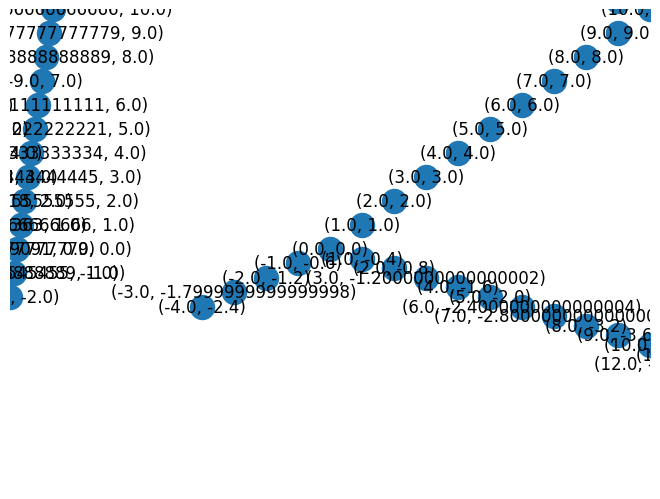

In [9]:
G1 = nx.Graph()
p = 1
for edge in G.edges:
  dX = edge[1][0] - edge[0][0]
  #print("dX = ", dX)
  dY = edge[1][1] - edge[0][1]
  #print("dY = ", dY)
  nbrL = max(abs(dX // p), abs(dY// p))
  #print("nbr = ", nbrL)
  alpha = dX / nbrL
  #print("alpha = ", alpha)
  beta = dY / nbrL
  #print("beta = ", beta)
  for i in range(nbrL):
    maxNode = max(edge[0][0], edge[1][0])
    G1.add_node((edge[0][0] + alpha*i, edge[0][1] + beta*i))
    #print((edge[0][0] + alpha*i, edge[0][1] + beta*i))
  #print(G.edges)
pos = {node: node for node in G1.nodes}
nx.draw(G1, pos, with_labels=True)
#nx.draw_networkx_nodes(G, pos, pointsCovered, node_color='red', )
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xticks(range(-10, 10))
plt.yticks(range(-10, 10))
plt.show()

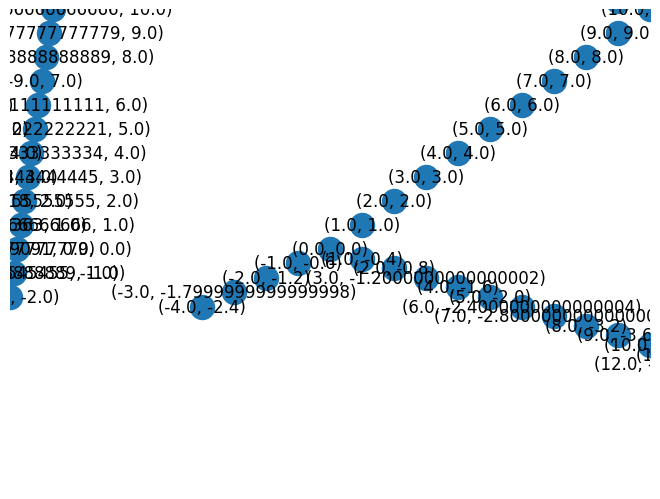

In [10]:
G1 = nx.Graph()
p = 1
for edge in G.edges:
  dX = edge[1][0] - edge[0][0]
  dY = edge[1][1] - edge[0][1]
  nbrL = max(abs(dX // p), abs(dY// p))
  alpha = dX / nbrL
  beta = dY / nbrL
  espacement = 0.5

  for i in range(nbrL):
    #maxNode = max(edge[0][0], edge[1][0])
    G1.add_node((edge[0][0] + alpha*i, edge[0][1] + beta*i))
    
pos = {node: node for node in G1.nodes}
nx.draw(G1, pos, with_labels=True)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xticks(range(-10, 10))
plt.yticks(range(-10, 10))
plt.show()

In [11]:

def showGraph(S):
    G2 = nx.Graph()

    points1 = [] #placement of lidars for one side
    points2 = [] #placement of lidars for other side
    points3 = [] #vertices to cover

    for i in range(edge[0][0], edge[1][0], 2):
        point = (i, 1)
        points1.append(point)

    for i in range(edge[0][0], edge[1][0], 2):
        point = (i, 4)
        points2.append(point)

    for i in range(edge[0][0], edge[1][0]):
        for j in range(2, 4):
            point = (i, j)
            points3.append(point)

    G2.add_nodes_from(points1 + points2 + points3)


    #edge that represents scope between lidar placement and vertices to cover
    for node1 in points1:
      for j in range (node1[1]+1, node1[1]+3):
        if(j==node1[1]+1):
          for i in range(node1[0]-2, node1[0]+3):
            if (i,j) in points3:
              G.add_edge(tuple(node1), (i,j))
        if(j== node1[1]+2):
          for i in range(node1[0]-1, node1[0]+2):
            if (i,j) in points3:
              G.add_edge(tuple(node1), (i,j))
    for node2 in points2:
      for j in range (node2[1]-2,node2[1]):
        if(j== node2[1]-2):
          for i in range(node2[0]-1, node2[0]+2):
            if (i,j) in points3:
              G.add_edge(tuple(node2), (i,j))
        if(j==node2[1]-1):
          for i in range(node2[0]-2, node2[0]+3):
            if (i,j) in points3:
              G.add_edge(tuple(node2), (i,j))


    #Draw the graph

    pos = {node: node for node in G.nodes()} 
    nx.draw(G, pos, with_labels=True)
    actE =[]
    for node in S:
      for edge in G.edges(node):
        actE.append(edge)
    # Draw the graph
    pos = {node: node for node in G.nodes()}
    nx.draw(G, pos, with_labels=True)

    #plt.xlim(-2, 13)
    #plt.ylim(-2, 7)

    #plt.xticks(range(1, 13))
    #plt.yticks(range(1, 7))
    nx.draw_networkx_nodes(G, pos, S, node_color='red')
    nx.draw_networkx_edges(G, pos, actE, edge_color='red')
    plt.show()